In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

### 1)

In [2]:
def label(data):
    label = np.ones(len(data))
    gz = np.where(data > [0,0])
    
    # 2. Quadrant
    q2 = np.intersect1d(np.where(data[:,0] > 0)[0],   # x - axis
                        np.where(data[:,1] > 0)[0] )  # y - axis
    
    # 4. Quadrant
    q4 = np.intersect1d(np.where(data[:,0] < 0)[0],   # x - axis
                        np.where(data[:,1] < 0)[0] )  # y - axis
    label[q2] = 0
    label[q4] = 0
    return label

def draw_sample_uniform(low = -6, high = 6,samples = 200):
    x = np.random.uniform(low,high,samples)
    y = np.random.uniform(low,high,samples)    
    return np.array([x,y]).T

In [3]:
train_x = draw_sample_uniform()
test_x  = draw_sample_uniform()
train_y = label(train_x)
test_y  = label(test_x)

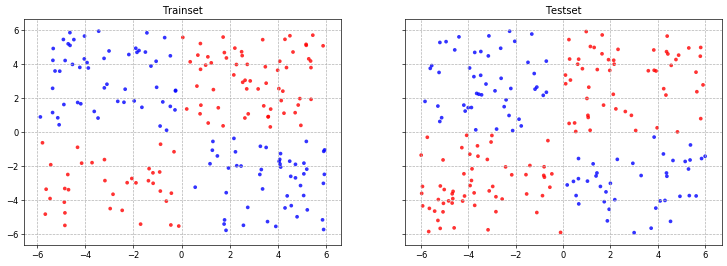

In [4]:
def plot(train_x,train_y,test_x,test_y):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5),dpi=60, sharex=False, sharey=True)
    color = ['red','blue']
    for i in range(len(train_x)):
        axes[0].scatter(train_x[i,0],
                      train_x[i,1],
                      alpha=0.8, 
                      edgecolors='none', 
                      s=20,
                      c = color[int(train_y[i])])
        if i < len(test_x):
            axes[1].scatter(test_x[i,0],
                          test_x[i,1],
                          alpha=0.8, 
                          edgecolors='none', 
                          s=20,
                          c = color[int(test_y[i])])
    axes[1].grid(linestyle='--')
    axes[1].set_title("Testset")
    axes[0].grid(linestyle='--')
    axes[0].set_title("Trainset")
    
    plt.show()
    

plot(train_x,train_y,test_x,test_y)


### 4)

Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektorberechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, dasandere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweiligeNeuron aussehen?

 - Die Daten sind doch schon in X und Y-Achse aufgeteilt? höchstens skalieren?

In [5]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))



In [6]:
train_x_100_100 = draw_sample_uniform(samples=100*100)
train_y_100_100 = label(train_x_100_100)
print(train_x_100_100.shape)
sigmoid_train = sigmoid(train_x_100_100)

(10000, 2)


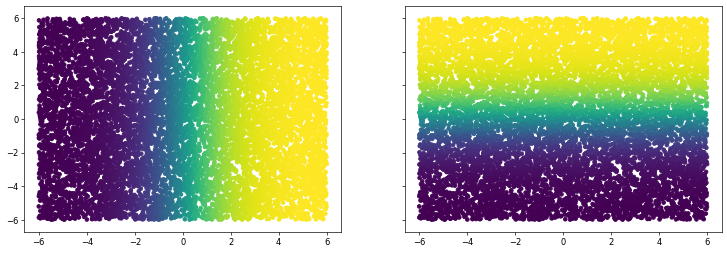

In [7]:
cm = plt.cm.get_cmap('RdYlBu')
fig, axes = plt.subplots(1, 2, figsize=(15, 5),dpi=60, sharex=False, sharey=True)
sc0 = axes[0].scatter(train_x_100_100[:,0],train_x_100_100[:,1],c=sigmoid_train[:,0],s=20)
sc1 = axes[1].scatter(train_x_100_100[:,0],train_x_100_100[:,1],c=sigmoid_train[:,1],s=20)
plt.show()

In [8]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)



Erste Fundamentalgleichung:

$\delta^L = \nabla_a C \odot \sigma^{'} (z^L)$ 

zweite:

$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma^{'}(z^l)$

dritte:

$\frac{\partial C}{\partial b_{j}^{l}} = \delta^l_j$

vierte:

$\frac{\partial C}{\partial w_{jk}^{l}} = a_k^{l-1}\delta^l_j$

In [9]:
#model.cost_derivative = cost_derivative

# Ableitung der Kreuzentropie
#def cost_derivative(output_activations, y):
#    return (output_activations-y)

In [10]:
#model.SGD(data, 1, 10, 0.003,data)

In [11]:
def cost(ypred,y):
    return np.array((y-ypred)**2).sum()/len(y)

# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y, z):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y) * sigmoid_prime(z)

def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Rückwärtslauf
    cost_ = (cost(activations[-1],y))
    delta = cost_derivative(activations[-1], y, zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return nabla_b, nabla_w,cost_

def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases
    error = 0
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(2,1)).copy()
        y = np.reshape(ymb[i,:],(1,1)).copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w, error = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return error



def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    err = []
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(2,1)).copy()
        y = np.reshape(y2[i,:],(1,1)).copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        err.append(cost(ypred,y))
        # Label ist in one-hot-Codierung: korrekte Klasse ist 1, alle anderen 0
        #c = np.argmax(y)
        
        # Index des maximal aktivierten Outputs ist die Entscheidung des Netzwerk
        #cpred = np.argmax(ypred)
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        
        if ypred > 0.5:
            ypred = 1
        if y == ypred:
            correct += 1
        
    correct / x2.shape[0]
    return correct, np.array(err).sum() / len(err)

def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):
    
    
 
    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse_err = []
    epoch_err = []
    epoch_eval_err = []
    acc_val = []
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            ymb = y0[k:k+mini_batch_size,:]
            error = update_mini_batch(xmb, ymb, eta)
            mse_err.append(error)
            print("Epoch {:4d}/{:4d} | COST {:.5f}".format(j+1,epochs,error),end="\r")
        error = np.array(mse_err).sum() / len(mse_err)
        
        epoch_err.append(error)
        acc,eval_err = evaluate(x2,y2)
        acc_val.append(acc)
        print("Epoch {:4d}/{:4d} | COST {:.5f} | EVAL_COST {:.5f}".format(j+1,epochs,error,eval_err),end="\n")
        epoch_eval_err.append(eval_err)
    return acc_val, epoch_err, epoch_eval_err


In [12]:
sizes = [2, 2,2, 1] # dreischichtiges MPL mit 784 Eingangs-, no_hidden versteckten, 10 Ausgangsneuronen
num_layers = len(sizes)   
# Neuinitialisierung mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
train_y_100_100 = train_y_100_100.reshape(train_y_100_100.shape[0],1)
test_y = test_y.reshape(test_y.shape[0],1)

train_y = train_y.reshape(train_y.shape[0],1)
                          
                          
                          
print(train_x_100_100.shape,train_y_100_100.shape)
print(test_x.shape,test_y.shape)

acc_val, epoch_err, epoch_eval_err = SGD(train_x,train_y, 150, 10, 1.0, test_x,test_y)



(10000, 2) (10000, 1)
(200, 2) (200, 1)
Epoch    1/ 150 | COST 0.30799 | EVAL_COST 0.27608
Epoch    2/ 150 | COST 0.27466 | EVAL_COST 0.25687
Epoch    3/ 150 | COST 0.26742 | EVAL_COST 0.25073
Epoch    4/ 150 | COST 0.26423 | EVAL_COST 0.25091
Epoch    5/ 150 | COST 0.26112 | EVAL_COST 0.25508
Epoch    6/ 150 | COST 0.25921 | EVAL_COST 0.25229
Epoch    7/ 150 | COST 0.25887 | EVAL_COST 0.24691
Epoch    8/ 150 | COST 0.25788 | EVAL_COST 0.24892
Epoch    9/ 150 | COST 0.25699 | EVAL_COST 0.25509
Epoch   10/ 150 | COST 0.25520 | EVAL_COST 0.25630
Epoch   11/ 150 | COST 0.25423 | EVAL_COST 0.24962
Epoch   12/ 150 | COST 0.25277 | EVAL_COST 0.25948
Epoch   13/ 150 | COST 0.25320 | EVAL_COST 0.25437
Epoch   14/ 150 | COST 0.25351 | EVAL_COST 0.24889
Epoch   15/ 150 | COST 0.25342 | EVAL_COST 0.25230
Epoch   16/ 150 | COST 0.25301 | EVAL_COST 0.25331
Epoch   17/ 150 | COST 0.25275 | EVAL_COST 0.25669
Epoch   18/ 150 | COST 0.25230 | EVAL_COST 0.25455
Epoch   19/ 150 | COST 0.25199 | EVAL_COST

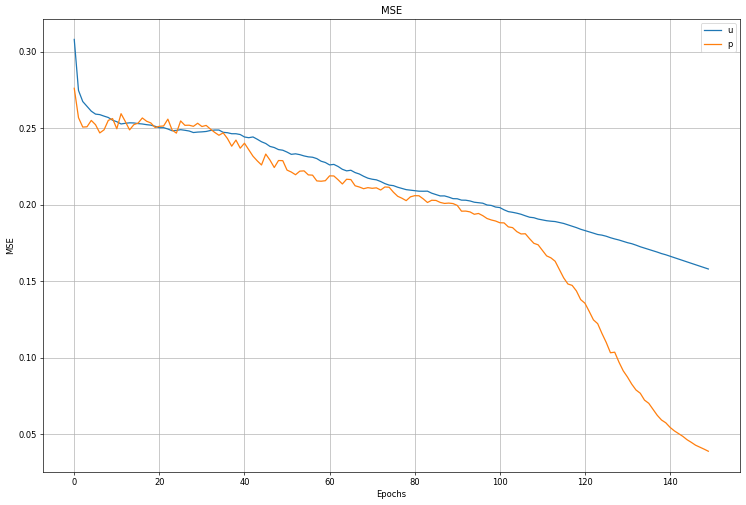

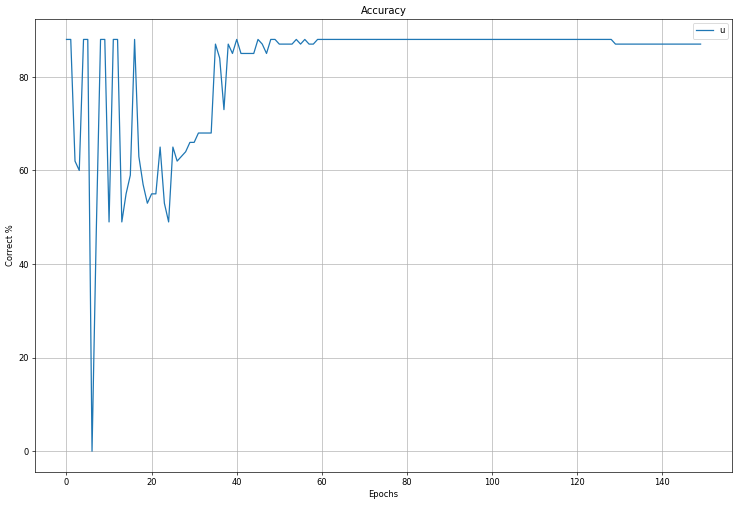

In [13]:
plt.subplots(figsize=(15, 10),dpi=60, sharex=False, sharey=True)
x = np.arange(0,len(epoch_err))
plt.plot(x,epoch_err,label="train_err")
plt.plot(x,epoch_eval_err,label="test_err")
plt.legend('upper right')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE")
plt.grid('--')
plt.show()

plt.subplots(figsize=(15, 10),dpi=60, sharex=False, sharey=True)
x = np.arange(0,len(epoch_err))
plt.plot(x,acc_val,label="Accuracy")
plt.legend('upper right')
plt.xlabel("Epochs")
plt.ylabel("Correct %")
plt.title("Accuracy")
plt.grid('--')
plt.show()

In [14]:
M,N=100,100
x=np.linspace(-6,6,M)
y=np.linspace(-6,6,N)
X,Y=np.meshgrid(x,y)
X=X.flatten()
Y=Y.flatten()
a=np.vstack((X,Y)).T

    
w0=[1,0]
w1=[0,1]
a_out_0=np.zeros(10000)
out=np.zeros(10000)
for i in range(0,10000):
    #print( feedforward( [[X[i]],[Y[i]]] ) )
    inp = ([ X[i]],[Y[i]])
    a_out_0[i] =feedforward( inp )[0]

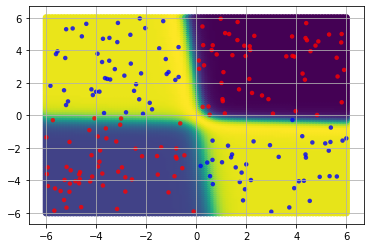

In [15]:
plt.scatter(X,Y,c=a_out_0)
color = ['red','blue']

c_map = [color[int(i[0]) ] for i in test_y]
plt.scatter(test_x[:,0],test_x[:,1],
                          alpha=0.8, 
                          edgecolors='none', 
                          s=20,
                          c=c_map)
plt.grid(True)
plt.show()

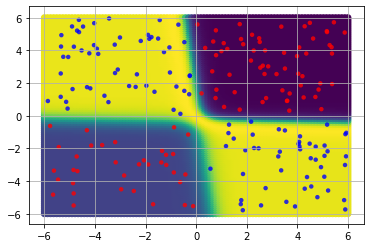

In [16]:
plt.scatter(X,Y,c=a_out_0)
color = ['red','blue']

c_map = [color[int(i[0]) ] for i in train_y]
plt.scatter(train_x[:,0],train_x[:,1],
                          alpha=0.8, 
                          edgecolors='none', 
                          s=20,
                          c=c_map)
plt.grid(True)
plt.show()

# Aufgabe  4



In [17]:

sizes = [2,2,2, 1] # dreischichtiges MPL mit 784 Eingangs-, no_hidden versteckten, 10 Ausgangsneuronen
num_layers = len(sizes)   
# Neuinitialisierung mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte


# Ableitung der Kreuzentropie
def cost_derivative(output_activations, y, z):
    c = output_activations-y
    return np.nan_to_num(c)

def cost(ypred,y):
    c = -y*np.log(ypred)-(1-y)*np.log(1-ypred)
    c = np.nan_to_num(c)
    return c.sum()/len(y)
    
train_x_cross = (train_x + 6) / 12
test_x_cross = (test_x + 6) / 12

acc_val, epoch_err, epoch_eval_err = SGD(train_x_cross,train_y, 150, 10, 1.0, test_x_cross,test_y)

Epoch    1/ 150 | COST 0.70951 | EVAL_COST 0.72635
Epoch    2/ 150 | COST 0.71549 | EVAL_COST 0.75625
Epoch    3/ 150 | COST 0.68725 | EVAL_COST 0.73235
Epoch    4/ 150 | COST 0.70116 | EVAL_COST 0.68712
Epoch    5/ 150 | COST 0.70989 | EVAL_COST 0.68682
Epoch    6/ 150 | COST 0.71460 | EVAL_COST 0.70193
Epoch    7/ 150 | COST 0.71063 | EVAL_COST 0.68807
Epoch    8/ 150 | COST 0.70866 | EVAL_COST 0.69524
Epoch    9/ 150 | COST 0.71096 | EVAL_COST 0.68721
Epoch   10/ 150 | COST 0.70651 | EVAL_COST 0.70946
Epoch   11/ 150 | COST 0.70386 | EVAL_COST 0.70006
Epoch   12/ 150 | COST 0.70198 | EVAL_COST 0.69271
Epoch   13/ 150 | COST 0.70278 | EVAL_COST 0.69391
Epoch   14/ 150 | COST 0.70564 | EVAL_COST 0.69095
Epoch   15/ 150 | COST 0.70368 | EVAL_COST 0.71412
Epoch   16/ 150 | COST 0.70427 | EVAL_COST 0.73965
Epoch   17/ 150 | COST 0.70481 | EVAL_COST 0.70496
Epoch   18/ 150 | COST 0.70505 | EVAL_COST 0.73368
Epoch   19/ 150 | COST 0.70557 | EVAL_COST 0.69040
Epoch   20/ 150 | COST 0.70433 

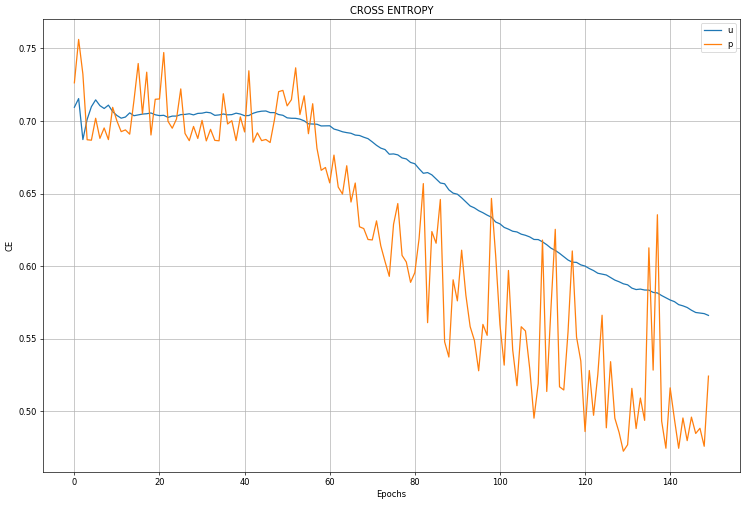

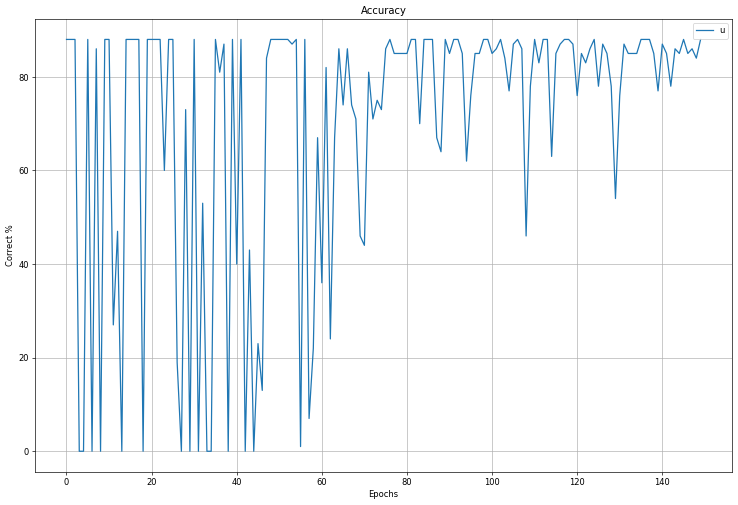

In [18]:
plt.subplots(figsize=(15, 10),dpi=60, sharex=False, sharey=True)
x = np.arange(0,len(epoch_err))
plt.plot(x,epoch_err,label='train_err')
plt.plot(x,epoch_eval_err,label='test_err')
plt.legend('upper right')
plt.xlabel("Epochs")
plt.ylabel("CE")
plt.title("CROSS ENTROPY")
plt.grid('--')
plt.show()

plt.subplots(figsize=(15, 10),dpi=60, sharex=False, sharey=True)
x = np.arange(0,len(epoch_err))
plt.plot(x,acc_val,label="Accuracy")
plt.legend('upper right')
plt.xlabel("Epochs")
plt.ylabel("Correct %")
plt.title("Accuracy")
plt.grid('--')
plt.show()

In [19]:
M,N=100,100
x=np.linspace(-6,6,M)
y=np.linspace(-6,6,N)
X,Y=np.meshgrid(x,y)
X=X.flatten()
Y=Y.flatten()
a=np.vstack((X,Y)).T
a.shape

(10000, 2)

In [20]:
w0=[1,0]
w1=[0,1]
a_out_0=np.zeros(10000)
a_out_1=np.zeros(10000)
for i in range(0,10000):
    a_out_0[i]=sigmoid(np.dot(w0,a[i]))
    a_out_1[i]=sigmoid(np.dot(w1,a[i]))


In [21]:
w0=[1,0]
w1=[0,1]
a_out_0=np.zeros(10000)
out=np.zeros(10000)
for i in range(0,10000):
    #print( feedforward( [[X[i]],[Y[i]]] ) )
    inp = ([ [(X[i] + 6 ) / 12 ],[(Y[i]  + 6) / 12 ]])
    a_out_0[i] =feedforward( inp )[0]

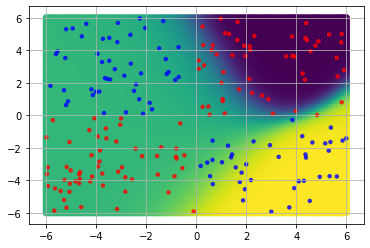

In [22]:
plt.scatter(X,Y,c=a_out_0)
color = ['red','blue']

c_map = [color[int(i[0]) ] for i in test_y]
plt.scatter(test_x[:,0],test_x[:,1],
                          alpha=0.8, 
                          edgecolors='none', 
                          s=20,
                          c=c_map)
plt.grid(True)
plt.show()

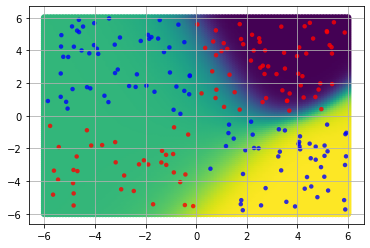

In [23]:
plt.scatter(X,Y,c=a_out_0)
color = ['red','blue']

c_map = [color[int(i[0]) ] for i in train_y]
plt.scatter(train_x[:,0],train_x[:,1],
                          alpha=0.8, 
                          edgecolors='none', 
                          s=20,
                          c=c_map)
plt.grid(True)
plt.show()